In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("/kaggle/input/googleplaystore/googleplaystore.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [20]:
# Convert Installs column
df["Installs"] = (
    df["Installs"]
    .str.replace("+", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float))

# Convert Price column
df["Price"] = (
    df["Price"]
    .str.replace("$", "", regex=False)
    .astype(float))

In [21]:
df.duplicated().sum()

474

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df["Category"] = df["Category"].str.strip().str.title()
df["Genres"] = df["Genres"].str.strip().str.lower()
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")

**1. What is the average rating of apps in the dataset?**

In [24]:
df['Rating'].mean()

4.187958586540625

**2. How many unique categories of apps are there?**

In [25]:
df['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)

**3. What is the distribution of app sizes?**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


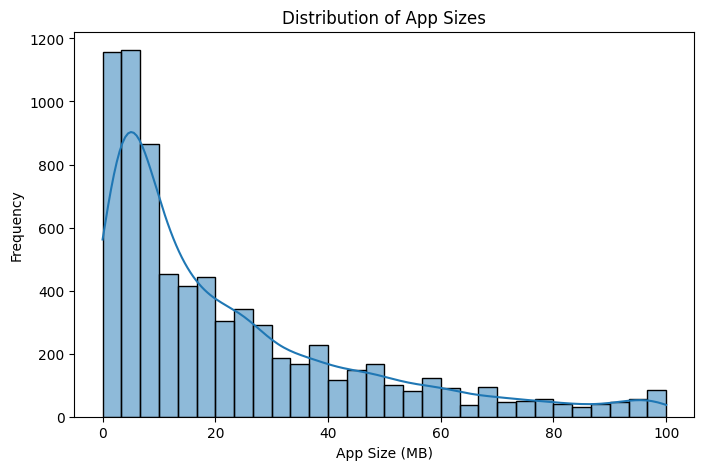

In [26]:
size_data = df["Size"].replace("Varies with device", None)

def size_to_mb(value):
    if isinstance(value, str):
        if value.endswith("M"):
            return float(value[:-1])
        elif value.endswith("k"):
            return float(value[:-1]) / 1024  # convert KB to MB
    return None

df["Size_MB"] = size_data.apply(size_to_mb)
plt.figure(figsize=(8,5))
sns.histplot(df["Size_MB"],bins=30,kde=True)
plt.xlabel("App Size (MB)")
plt.ylabel("Frequency")
plt.title("Distribution of App Sizes")
plt.show()

**4. How many free vs paid apps are there?**

In [27]:
df['Type'].value_counts()

Type
Free    8275
Paid     611
Name: count, dtype: int64

**5. What is the most common content rating for apps?**

In [28]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

**6. What are the top 5 most installed apps?**

In [31]:
df.sort_values(by="Installs", ascending=False).head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
5395,Google Photos,Photography,4.5,10847682,Varies with device,1.000000e+09,Free,0.0,Everyone,photography,2018-08-01,Varies with device,Varies with device,NaN
391,Skype - free IM & video calls,Communication,4.1,10484169,Varies with device,1.000000e+09,Free,0.0,Everyone,communication,2018-08-03,Varies with device,Varies with device,NaN
3816,Google News,News_And_Magazines,3.9,877643,13M,1.000000e+09,Free,0.0,Teen,news & magazines,2018-08-01,5.2.0,4.4 and up,13.0
2853,Google Photos,Photography,4.5,10858538,Varies with device,1.000000e+09,Free,0.0,Everyone,photography,2018-08-06,Varies with device,Varies with device,NaN
3234,Google,Tools,4.4,8033493,Varies with device,1.000000e+09,Free,0.0,Everyone,tools,2018-08-03,Varies with device,Varies with device,NaN


**7. How many apps have a rating of 4.0 and above?**

In [32]:
a=df[df['Rating']>=4.0]
a

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159,19M,10000.0,Free,0.0,Everyone,art & design,2018-01-07,1.0.0,4.0.3 and up,19.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,art & design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,25M,50000000.0,Free,0.0,Teen,art & design,2018-06-08,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,2.8M,100000.0,Free,0.0,Everyone,art & design;creativity,2018-06-20,1.1,4.4 and up,2.8
5,Paper flowers instructions,Art_And_Design,4.4,167,5.6M,50000.0,Free,0.0,Everyone,art & design,2017-03-26,1.0,2.3 and up,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,Family,4.0,7,2.6M,500.0,Free,0.0,Everyone,education,2017-06-18,1.0.0,4.1 and up,2.6
10836,Sya9a Maroc - FR,Family,4.5,38,53M,5000.0,Free,0.0,Everyone,education,2017-07-25,1.48,4.1 and up,53.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6M,100.0,Free,0.0,Everyone,education,2018-07-06,1.0,4.1 and up,3.6
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,books & reference,2015-01-19,Varies with device,Varies with device,NaN


**8. What is the average number of reviews for free vs paid apps?**

In [33]:
# Convert Reviews column to numeric
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

df.groupby("Type")["Reviews"].mean()

Type
Free    506924.445196
Paid     14898.306056
Name: Reviews, dtype: float64

**9. What is the average app size for each category?**

In [34]:
df.groupby('Category')['Size_MB'].mean()


Category
Art_And_Design         12.939655
Auto_And_Vehicles      21.541211
Beauty                 15.513514
Books_And_Reference    14.227896
Business               14.010306
Comics                 13.157721
Communication          12.337203
Dating                 17.597872
Education              20.035333
Entertainment          22.638806
Events                 14.432268
Family                 29.751149
Finance                18.610992
Food_And_Drink         24.057317
Game                   45.102102
Health_And_Fitness     23.056692
House_And_Home         17.678000
Libraries_And_Demo     12.696316
Lifestyle              15.513314
Maps_And_Navigation    17.448635
Medical                19.246883
News_And_Magazines     12.645684
Parenting              21.579545
Personalization        11.659380
Photography            17.032073
Productivity           12.756159
Shopping               16.913520
Social                 18.268768
Sports                 26.445611
Tools                   8.290091
T

**10. How many apps were last updated in 2018?**

In [35]:
df[df['Last Updated'].dt.year==2018]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159,19M,10000.0,Free,0.0,Everyone,art & design,2018-01-07,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,Art_And_Design,3.9,967,14M,500000.0,Free,0.0,Everyone,art & design;pretend play,2018-01-15,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,art & design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,25M,50000000.0,Free,0.0,Teen,art & design,2018-06-08,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,2.8M,100000.0,Free,0.0,Everyone,art & design;creativity,2018-06-20,1.1,4.4 and up,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,Family,5.0,22,8.6M,1000.0,Free,0.0,Teen,education,2018-06-27,3.8.0,4.1 and up,8.6
10826,Frim: get new friends on local chat rooms,Social,4.0,88486,Varies with device,5000000.0,Free,0.0,Mature 17+,social,2018-03-23,Varies with device,Varies with device,NaN
10827,Fr Agnel Ambarnath,Family,4.2,117,13M,5000.0,Free,0.0,Everyone,education,2018-06-13,2.0.20,4.0.3 and up,13.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6M,100.0,Free,0.0,Everyone,education,2018-07-06,1.0,4.1 and up,3.6


# Medium-Level Questions:

**1. What is the correlation between the number of installs and the app rating?**

In [36]:
np.corrcoef(df["Installs"],df["Rating"])[0, 1]

0.05086906567316973

**2. Which app categories have the highest average rating?**

In [37]:
df.groupby('Category')['Rating'].mean()

Category
Art_And_Design         4.377049
Auto_And_Vehicles      4.190411
Beauty                 4.278571
Books_And_Reference    4.347458
Business               4.102593
Comics                 4.155172
Communication          4.151466
Dating                 3.971698
Education              4.375969
Entertainment          4.136036
Events                 4.435556
Family                 4.191264
Finance                4.127445
Food_And_Drink         4.164151
Game                   4.281285
Health_And_Fitness     4.261450
House_And_Home         4.164706
Libraries_And_Demo     4.179688
Lifestyle              4.096066
Maps_And_Navigation    4.051613
Medical                4.182450
News_And_Magazines     4.128505
Parenting              4.300000
Personalization        4.333117
Photography            4.182895
Productivity           4.201796
Shopping               4.251485
Social                 4.254918
Sports                 4.225175
Tools                  4.047203
Travel_And_Local       4.094146

**3. How does the price of an app affect its average rating?**

In [38]:
paid_apps = df[df["Price"] > 0]
paid_apps.groupby("Price")["Rating"].mean()

Price
0.99      4.300962
1.00      4.450000
1.20      4.200000
1.29      4.100000
1.49      4.190000
            ...   
299.99    3.800000
379.99    2.900000
389.99    3.600000
399.99    4.009091
400.00    3.600000
Name: Rating, Length: 72, dtype: float64

**4. What is the distribution of app ratings across different content ratings?**

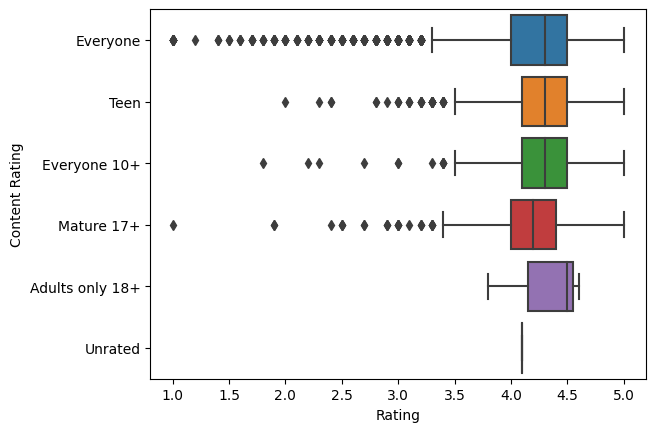

In [39]:
sns.boxplot(data=df,x='Rating',y='Content Rating')
plt.show()

**5. Which genres have the most apps with over 1 million installs?**

In [40]:
install_over_1m=df[df['Installs']>=1000000]
install_over_1m.groupby('Genres')['App'].count()

Genres
action                                   237
action;action & adventure                 12
adventure                                 30
adventure;action & adventure              11
adventure;education                        2
                                        ... 
video players & editors                   93
video players & editors;creativity         2
video players & editors;music & video      3
weather                                   45
word                                      20
Name: App, Length: 100, dtype: int64

**6. How frequently do apps get updated? Calculate the average time between updates.**

In [41]:
df_new=df.sort_values(by=["App", "Last Updated"])
df_new.groupby('App')['Last Updated'].diff().dt.days

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


8532   NaN
324    NaN
4541   NaN
4636   NaN
5940   NaN
        ..
6420   NaN
4362   NaN
2575   NaN
7559   NaN
882    NaN
Name: Last Updated, Length: 8886, dtype: float64

**7. What is the impact of app size on the number of installs?**

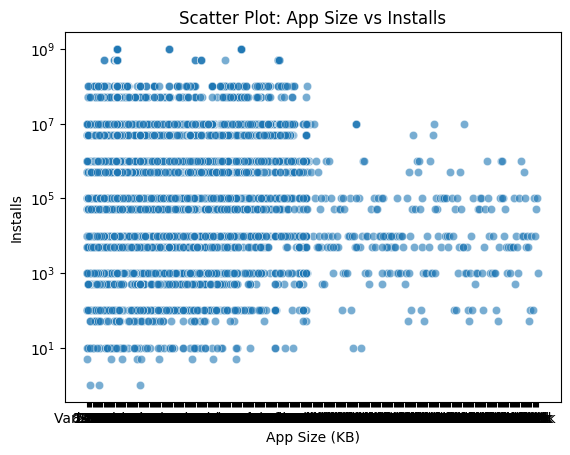

In [42]:
sns.scatterplot(data=df,x='Size',y='Installs',alpha=0.6)
plt.xlabel("App Size (KB)")
plt.ylabel("Installs")
plt.title("Scatter Plot: App Size vs Installs")
plt.yscale("log")  
plt.show()

**8. Which apps have the highest number of reviews, and what are their ratings?**

In [43]:
df1=df.dropna(subset=['Reviews','Rating'])
df1[['App','Reviews','Rating']].sort_values(by='Reviews',ascending=False).head(10)

,App,Reviews,Rating
2544,Facebook,78158306,4.1
3943,Facebook,78128208,4.1
336,WhatsApp Messenger,69119316,4.4
3904,WhatsApp Messenger,69109672,4.4
2604,Instagram,66577446,4.5
2545,Instagram,66577313,4.5
3909,Instagram,66509917,4.5
382,Messenger – Text and Video Chat for Free,56646578,4.0
335,Messenger – Text and Video Chat for Free,56642847,4.0
1879,Clash of Clans,44893888,4.6


**9. How does the content rating distribution differ between free and paid apps?**

   Type   Content Rating  Count
0  Free  Adults only 18+      3
1  Free         Everyone   6571
2  Free     Everyone 10+    328
3  Free       Mature 17+    395
4  Free             Teen    977
5  Free          Unrated      1
6  Paid         Everyone    518
7  Paid     Everyone 10+     32
8  Paid       Mature 17+     16
9  Paid             Teen     45


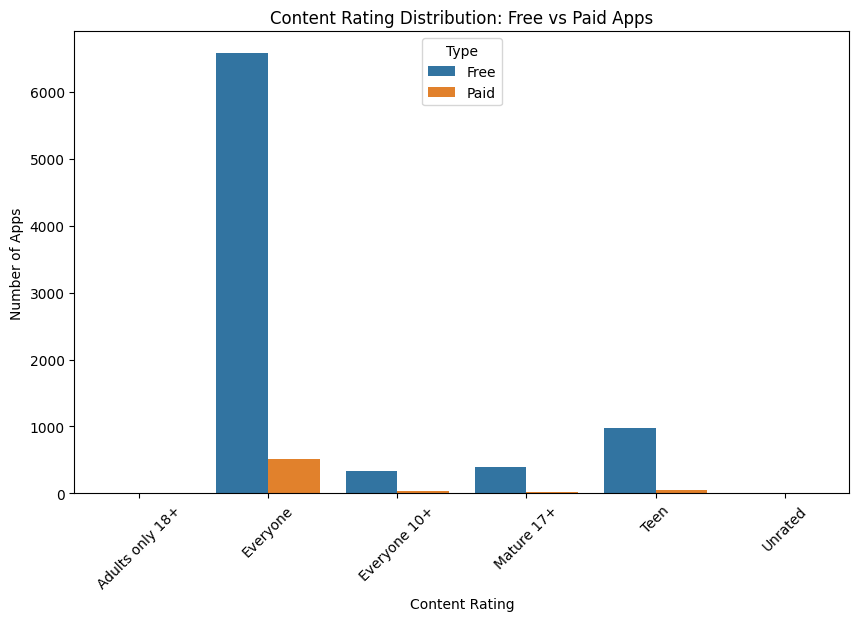

In [44]:
df2= df[['App','Type','Content Rating']]
content_dist = df2.groupby(['Type','Content Rating']).size().reset_index(name='Count')
print(content_dist)
plt.figure(figsize=(10,6))
sns.barplot(data=content_dist, x='Content Rating', y='Count', hue='Type')

plt.title("Content Rating Distribution: Free vs Paid Apps")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.show()

**10. What are the top 5 categories with the most installs?**

In [45]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

Category
Game             3.154386e+10
Communication    2.415224e+10
Social           1.251384e+10
Productivity     1.246307e+10
Tools            1.145022e+10
Name: Installs, dtype: float64

# Advanced-Level Questions:
**1. What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?**

In [46]:
df_clean = df.dropna(subset=['Rating','Reviews','Installs'])
top_rated = df_clean[['App','Category','Rating','Reviews','Installs']].sort_values(
    by=['Rating','Reviews'], ascending=[False, False]
).head(10)

print(top_rated)

                                                     App            Category  \
10357                                         Ríos de Fe           Lifestyle   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)             Finance   
8058                                          Oración CX           Lifestyle   
6823                      Barisal University App-BU Face              Family   
9496                                          Master E.K              Family   
7506                                             CL REPL               Tools   
5230                                              AJ Cam         Photography   
5196    AI Today : Artificial Intelligence News & AI 101  News_And_Magazines   
7842                         CS & IT Interview Questions              Family   
9517                                             Ek Vote        Productivity   

       Rating  Reviews  Installs  
10357     5.0      141    1000.0  
10301     5.0      104    1000.0  
8058      5.0 

**2. Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


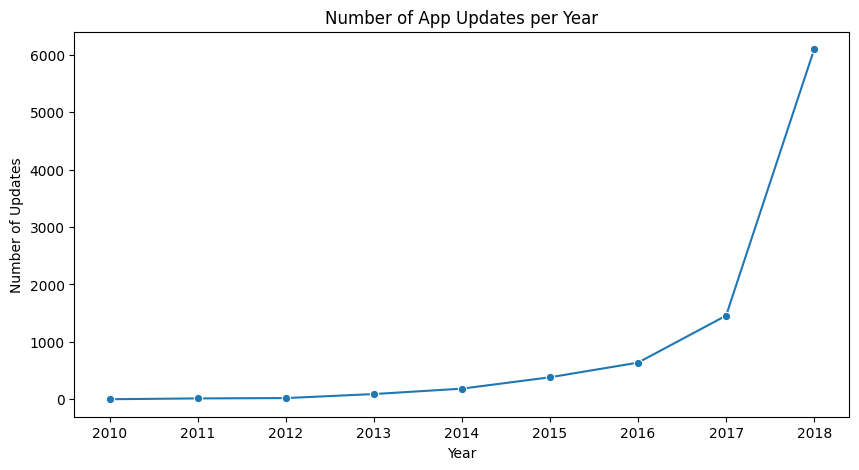

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


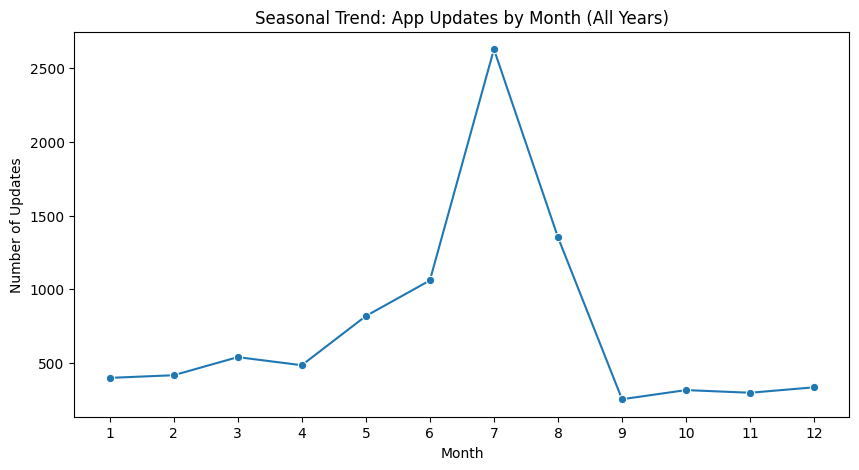

In [47]:
df['Year'] = df['Last Updated'].dt.year
df['Month'] = df['Last Updated'].dt.month

updates_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=updates_per_year.index, y=updates_per_year.values, marker='o')
plt.title("Number of App Updates per Year")
plt.xlabel("Year")
plt.ylabel("Number of Updates")
plt.show()

updates_per_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=updates_per_month.index, y=updates_per_month.values, marker='o')
plt.title("Seasonal Trend: App Updates by Month (All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Updates")
plt.xticks(range(1,13))
plt.show()

**3. How does the average rating of apps change with the number of installs? Create a binned analysis.**

  Install_Bin    Rating
0         <1k  4.198353
1      1k–10k  4.031352
2    10k–100k  4.094653
3     100k–1M  4.207100
4      1M–10M  4.285675
5    10M–100M  4.382995
6       100M+  4.309091


/tmp/ipykernel_48/957114643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_bin = df.groupby('Install_Bin')['Rating'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


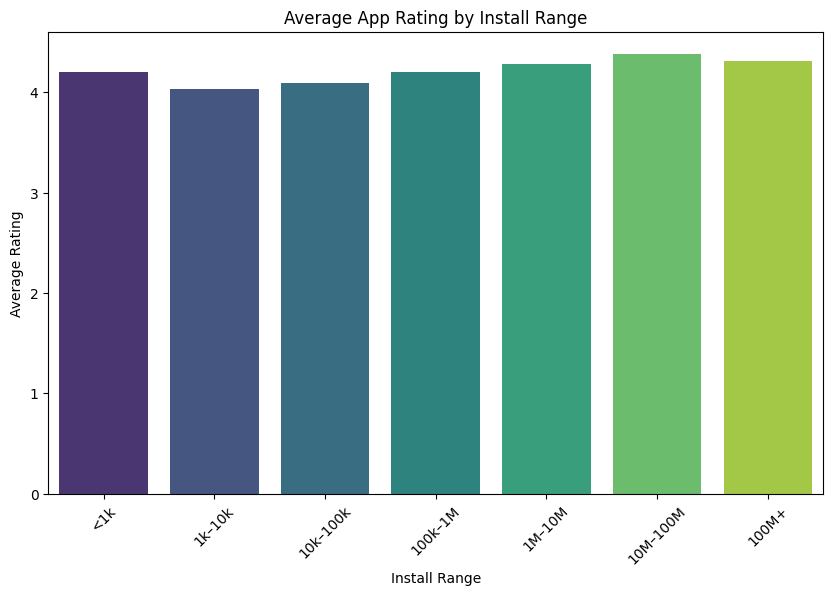

In [48]:
# --- Define bins for installs ---
bins = [0, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]
labels = ['<1k','1k–10k','10k–100k','100k–1M','1M–10M','10M–100M','100M+']
df['Install_Bin'] = pd.cut(df['Installs'], bins=bins, labels=labels, include_lowest=True)
rating_by_bin = df.groupby('Install_Bin')['Rating'].mean().reset_index()

print(rating_by_bin)

plt.figure(figsize=(10,6))
sns.barplot(data=rating_by_bin, x='Install_Bin', y='Rating', palette="viridis")

plt.title("Average App Rating by Install Range")
plt.xlabel("Install Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()            

**4. Perform sentiment analysis on app reviews (if review text is available) to determine the common themes in high and low-rated apps.**

Sentiment
Neutral     6686
Positive    1838
Negative     362
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


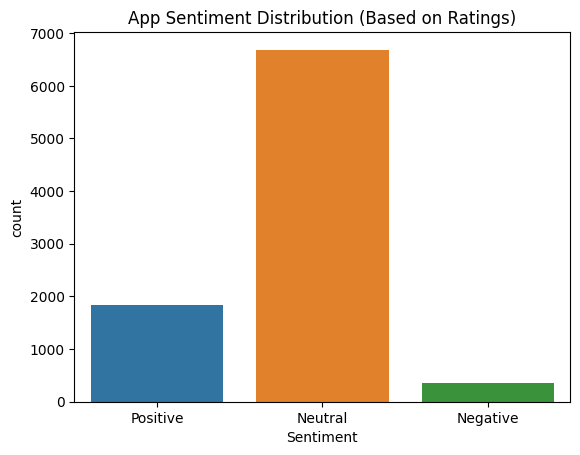

/tmp/ipykernel_48/488891121.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sentiment = df.groupby(['Category','Sentiment']).size().reset_index(name='Count')


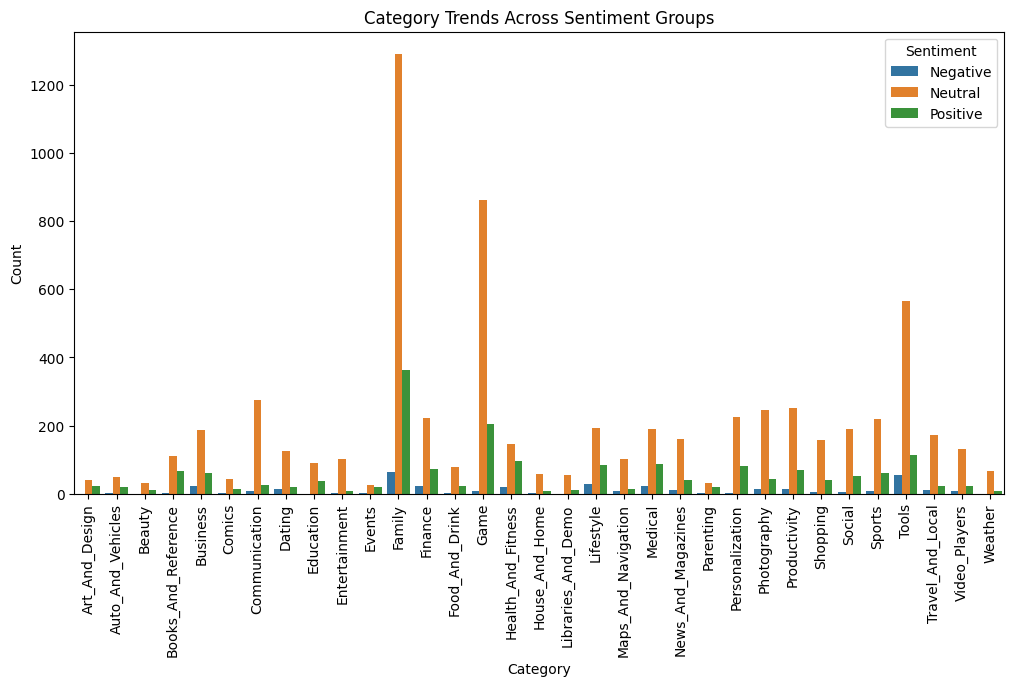

In [49]:
# Define sentiment buckets
df['Sentiment'] = pd.cut(df['Rating'],
                         bins=[0,3,4.5,5],
                         labels=['Negative','Neutral','Positive'],
                         include_lowest=True)

# Distribution of sentiment
print(df['Sentiment'].value_counts())

sns.countplot(data=df, x='Sentiment', order=['Positive','Neutral','Negative'])
plt.title("App Sentiment Distribution (Based on Ratings)")
plt.show()

# Themes: Top categories for Positive vs Negative apps
category_sentiment = df.groupby(['Category','Sentiment']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=category_sentiment, x='Category', y='Count', hue='Sentiment')
plt.title("Category Trends Across Sentiment Groups")
plt.xticks(rotation=90)
plt.show()

**5. What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?**

Genres
comics;creativity              4.800000
board;pretend play             4.800000
health & fitness;education     4.700000
puzzle;education               4.600000
adventure;brain games          4.600000
strategy;action & adventure    4.600000
entertainment;creativity       4.533333
music;music & video            4.533333
tools;education                4.500000
strategy;education             4.500000
Name: Rating, dtype: float64
Genres
entertainment;pretend play               4.000000
video players & editors;music & video    4.000000
lifestyle;pretend play                   4.000000
dating                                   3.971698
educational;creativity                   3.960000
health & fitness;action & adventure      3.900000
art & design;pretend play                3.900000
educational                              3.871875
parenting;education                      3.866667
parenting;brain games                    3.800000
Name: Rating, dtype: float64


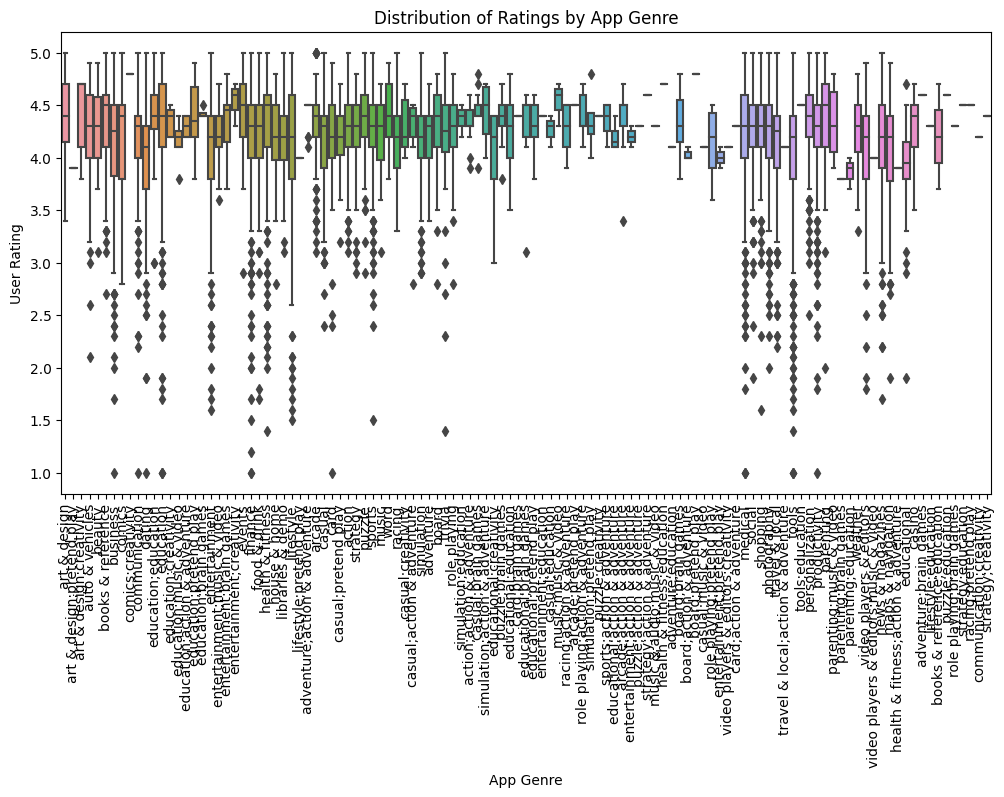

In [50]:
genre_ratings = df.groupby('Genres')['Rating'].mean().sort_values(ascending=False)

print(genre_ratings.head(10))   # Top 10 genres
print(genre_ratings.tail(10))   # Bottom 10 genres

# --- Visualization ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Genres', y='Rating')
plt.xticks(rotation=90)
plt.title("Distribution of Ratings by App Genre")
plt.ylabel("User Rating")
plt.xlabel("App Genre")
plt.show()

# Case Study Document

Problem Statement

The Google Play Store hosts millions of apps across multiple categories. Users leave ratings and reviews that reflect app quality, usability, and popularity. The objective is to analyze this dataset to:

Understand app characteristics that drive popularity and ratings.

Explore relationships between installs, reviews, size, price, and content ratings.

Identify patterns in app updates, categories, and user preferences.

Derive insights that could help developers improve app strategy and performance.